### Image Restoration / Reconstruction

Includes:
- fixing damaged images
- text removal
- logo removal
- object removal

### Inpainting

- reconstructing lost parts of images
- by exploring that is non-damaged in images

In [ ]:
from skimage.restoration import inpaint

#obtain the mask
mask = get_mask(defected_image)

#applying inpaiting to the damaged image using the mask
restored_image = inpaint.inpaint_biharmonic(defected_image,
                                           mask,
                                           multichannel=True)

#show
show_image(defected_image, "Image to Restore")
show_image(restored_image, "Image Restored")

example of a get_mask function

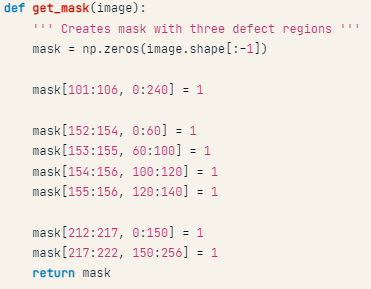

### Noise

Images are signals 
   - real-world signals contain departures from the ideal signal (ie. the perfect image) as we observe with our eyes in real life, such departures are considered "noise"

Noise is the result of errors in the image acquisition process that result in pixel values that do not reflect true intensities of the real scene.

#### Salt and Pepper Noise

In [ ]:
#adding random noise to an image

from skimage.util import random_noise
noisy_image = random_noise(image)

#show
show_image(image, "Original")
show_image(noisy_image, "Image with Noise")

#### Denoising Types

- Total variation (TV)
- Bilateral filtering (smooths imagees while maintaining edges)
- Wavelet denoising
- non-local means denoising

#### Total Variation

In [ ]:
from skimage.restoration import denoise_tv_chambolle

#apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image,
                                     weight=0.1,
                                     multichannel=True)

#show
show_image(noisy_image, "Noisy Image")
show_image(denoised_image, "Denoised Image")

#### Bilateral Denoising Filter

In [ ]:
from skimage.restoration import denoise_bilateral

#apply it
denoised_image = denoise_bilatera(noisy_image, multichannel=True)

#show
show_image(noisy_image, "Noisy Image")
show_image(denoised_image, "Denoised Image")

### Segmentation & Superpixels

- separating foreground from background
- a super pixel is a group of connected pixels with similar colors or gray levels
- these carry more than their simple pixel grid counterparts

#### Advantages of superpixels

- 1 - more meaningful regions
- 2 - computational efficiency

Types of Segmentation
- supervised: ex, SLIC (Simple Linear Iterative Clustering)
- unsupervised

### Finding Contours

- A **contours** is a closed shape of points or line segments, representing the boundaries of these objects. 
- Once contours are known: could identify and quantify objects in an image

In [ ]:
#the image has to binary
thesh = threshold_otsu(image)

#apply thresholding
thresholded_image = image > thresh

##### find_contours function

- finds contour lines or joins points (pixels) of **equal elevation or brightness in a 2D array** above a given level value that best detects the contours

In [ ]:
controus = measure.find_contours(threshold_image, 0.8)

#### Steps to spotting contours

In [ ]:
#1 - import modules
from skimage import measure
from skimage.filters import threshold_otsu

#2 - make the image grayscale
image = color.rgb2gray(image)

#3 - obtain the optimal thresh value of the image
thresh = threshold_otsu(image)

#4 - apply thresholding and obtain binary image
threholded_image = image > thresh

#5 - Find contours at a constant value of 0.8
contours = measure.find_contours(threshold_image, 0.8)

#### Contour's Shape

- an outline formed by multiple points connected together
- the **bigger** the contour, the more points joined together and the wider the perimeter formed